# Terceiro Modelo

KNN (K Nearest Neighbor)

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
import sys
sys.path.append('../')

In [2]:
from ml.sklearn_pipelines import run_knn_pipeline

In [3]:
data_path = '../data/processed/'
model_path = '../models/'
model_name = 'knn_01'

In [4]:
# Carregando os dados
test_images = np.load(data_path+"test_images.npy")
test_labels = np.load(data_path+"test_labels.npy")
test_images = test_images.reshape(len(test_labels),784)


In [5]:
# Normalizando os dados
test_images = test_images / 255.0

In [6]:
# Treinando, avaliando e salvando o modelo
run_knn_pipeline(data_path, model_name , model_path)

fit...

Test accuracy: 0.9688


In [7]:
# Carregando o modelo
filename = model_path + f'/{model_name}/{model_name}.sav'
model = pickle.load(open(filename, 'rb'))


In [8]:
predictions = model.predict(test_images)

In [9]:
for y_real, y_pred in zip(predictions[:10],test_labels[:10]):
    print(f"Valor Real:{y_real} ===> Prev.:{y_pred}")

Valor Real:7 ===> Prev.:7
Valor Real:2 ===> Prev.:2
Valor Real:1 ===> Prev.:1
Valor Real:0 ===> Prev.:0
Valor Real:4 ===> Prev.:4
Valor Real:1 ===> Prev.:1
Valor Real:4 ===> Prev.:4
Valor Real:9 ===> Prev.:9
Valor Real:5 ===> Prev.:5
Valor Real:9 ===> Prev.:9


Text(69.0, 0.5, 'Truth')

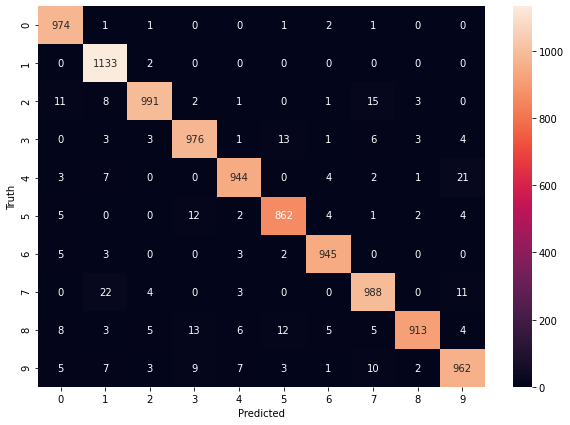

In [10]:
# Matriz de confusão
cm = confusion_matrix(y_true=test_labels,y_pred = predictions)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')